# Projeto Prático 2
## Disciplina: Redes Neurais Artificais
 Alunos:
 Adham Lucas (1715310001),
 Enrique Izel (1715310048),
 Nayara Cerdeira (1715310038),
 Vitor Simões (1715310025).
 ### Código: 2

# Importação das Bibliotecas
Esta primeira cedula foi destinada a importação das bibliotecas utilizadas

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from ellolib import Perceptron

# Abertura dos dados
Dados no formato txt com conteúdo em binário descrevendo um numpy.ndarray

In [130]:
file = np.fromfile("./rna-2020.1-pp2-data/dataAll.txt")
file = file.reshape((int(file.shape[0] / 3), 3))

## Parte 1 - Resolvendo Problema Linearmente Separavél

In [131]:
b = Perceptron(dataset= file)
b.fit()
print("## reta")
reta = b.generate_hyperplane()

------ Epoch 1 ------
### Weights [  0.35280336  36.01147207 -24.83382229]
### Weights [   0.45280336  -17.64757793 -101.32957229]
### Weights [  0.35280336  55.14844207 -65.50001229]
### Weights [  0.25280336 137.74714207  14.35581771]
### Weights [  0.35280336 143.59290207 -63.93877229]
### Weights [   0.45280336  103.58399207 -141.83146229]
### Weights [  0.55280336 157.25380207 -92.73919229]
### Weights [   0.45280336  104.29374207 -149.60865229]
### Weights [  0.55280336 163.85326207 -99.48632229]
### Weights [   0.45280336  118.32863207 -165.12225229]
### Weights [  0.55280336 209.04449207 -90.40893229]
### Weights [   0.45280336  151.26350207 -150.71708229]
### Weights Adjust 12
------ Epoch 2 ------
### Weights Adjust 12
------------------------------ 
Total Weights' adjust=12
## reta
[-999.9963     -959.2445898  -918.49287959 -877.74116939 -836.98945918
 -796.23774898 -755.48603878 -714.73432857 -673.98261837 -633.23090816
 -592.47919796 -551.72748776 -510.97577755 -470.224067

In [132]:
print("Total de épocas: ",b.number_of_epochs)
print("Total de ajustes de pesos: ", b.number_of_weights_adjust)

Total de épocas:  3
Total de ajustes de pesos:  12


## Gráfico com a reta de separação das classes
reta obtida com o treinamento do neurônio

Text(0, 0.5, 'Coord Y')

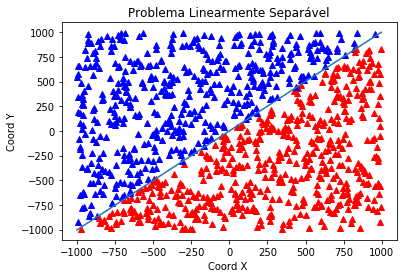

In [133]:
color = ['^b', '^r']

for point,y in zip(b.x_training, b.y_training):
    plt.plot(point[0], point[1], color[int(y)])

plt.plot(reta[0], reta[1])
plt.title("Problema Linearmente Separável")
plt.xlabel('Coord X ')
plt.ylabel("Coord Y")



# Parte 2 - Experimentação
Foi utilizado o data2.txt

In [21]:
file = np.fromfile("./rna-2020.1-pp2-data/data2.txt")
file = file.reshape((int(file.shape[0] / 3), 3))
print(file)
learn_taxs = [0.4, 0.1, 0.01]
weights = [[-100,  100], [-1,  1], [-0.5,  0.5]]

results = {}

for tax in learn_taxs:
    for weight in weights:
        key = str(tax) + str(weight)
        results[key] = []
        print(key)

        for i in range(0, 101):
            b = Perceptron(
                    dataset=file, weight_random_seed=weight, learn_tax=tax)
            b.fit()

            results[key].append({
                    'hyperplane': b.generate_hyperplane(),
                    'number_of_weights_adjust': b.number_of_weights_adjust,
                    'number_of_epochs': b.number_of_epochs
                })
print(results)

,  0.21157097,  0.24477859,  0.27798622,  0.31119384,
        0.34440147,  0.37760909,  0.41081672,  0.44402435,  0.47723197,
        0.5104396 ,  0.54364722,  0.57685485,  0.61006247,  0.6432701 ,
        0.67647773,  0.70968535,  0.74289298,  0.7761006 ,  0.80930823,
        0.84251585,  0.87572348,  0.90893111,  0.94213873,  0.97534636,
        1.00855398,  1.04176161,  1.07496923,  1.10817686,  1.14138448,
        1.17459211,  1.20779974,  1.24100736,  1.27421499,  1.30742261]), [0.6114717394437567, 0.5869022852561886, 0.5623328310686206, 0.5377633768810526, 0.5131939226934845, 0.48862446850591656, 0.46405501431834856, 0.4394855601307805, 0.4149161059432125, 0.3903466517556445, 0.3657771975680764, 0.3412077433805084, 0.3166382891929404, 0.2920688350053724, 0.2674993808178044, 0.24292992663023635, 0.21836047244266832, 0.19379101825510034, 0.16922156406753228, 0.14465210987996427, 0.12008265569239623, 0.09551320150482823, 0.07094374731726016, 0.04637429312969216, 0.021804838942124205

In [23]:
keys =[]
for key in results:
    keys.append(key)

In [27]:
def plotar_graficos(subplot, reta, title):
    color = ['^b', '^r']
    for point,y in zip(b.x_training, b.y_training):
        subplot.plot(point[0], point[1], color[int(y)])
    
    subplot.plot(reta[0],reta[1])
    subplot.set_title(title)

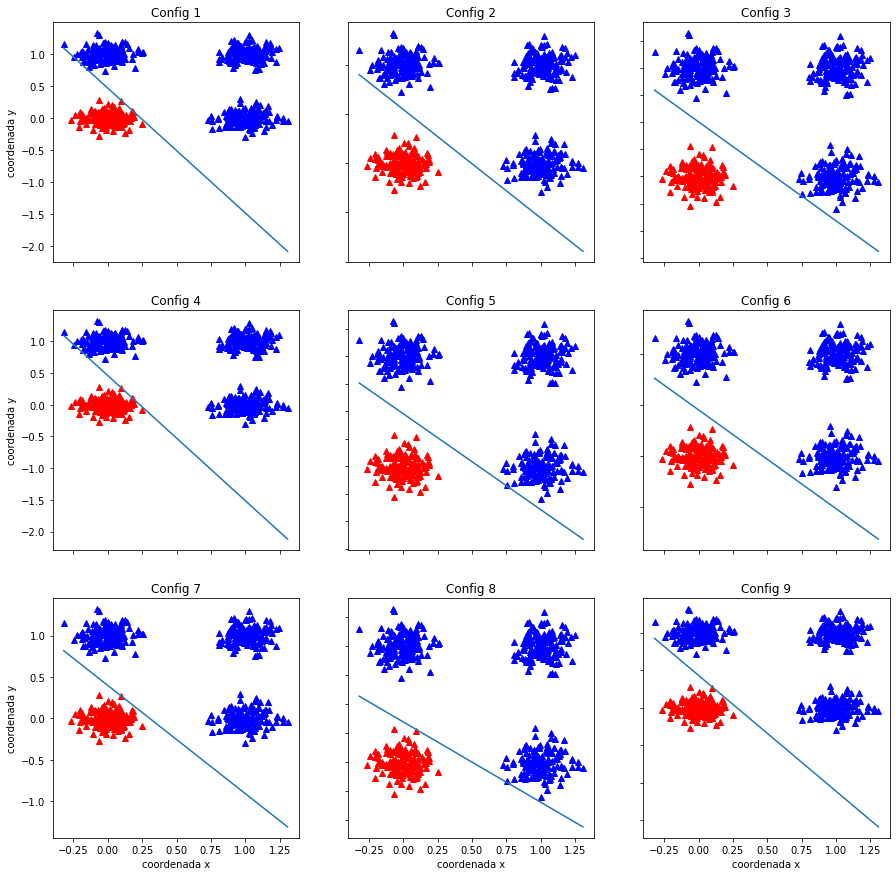

In [30]:
fig, axs = plt.subplots(3, 3, figsize =(15,15))
plotar_graficos(axs[0, 0], results[keys[0]][0]['hyperplane'], "Config 1")
plotar_graficos(axs[0, 1], results[keys[1]][0]['hyperplane'], "Config 2")
plotar_graficos(axs[0, 2], results[keys[2]][0]['hyperplane'], "Config 3")
plotar_graficos(axs[1, 0], results[keys[3]][0]['hyperplane'], "Config 4")
plotar_graficos(axs[1, 1], results[keys[4]][0]['hyperplane'], "Config 5")
plotar_graficos(axs[1, 2], results[keys[5]][0]['hyperplane'], "Config 6")
plotar_graficos(axs[2, 0], results[keys[6]][0]['hyperplane'], "Config 7")
plotar_graficos(axs[2, 1], results[keys[7]][0]['hyperplane'], "Config 8")
plotar_graficos(axs[2, 2], results[keys[8]][0]['hyperplane'], "Config 9")


for ax in axs.flat:
    ax.set(xlabel='coordenada x', ylabel='coordenada y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [42]:
configs = np.array([])
for key in keys:
    number_of_weight_adjust = np.array([])
    epochs = np.array([])
    for i in results[key]:
        number_of_weight_adjust = np.append(number_of_weight_adjust, i['number_of_weights_adjust'])
        epochs = np.append(epochs, i['number_of_epochs'])
    configs = np.append(configs, np.array([np.mean(number_of_weight_adjust), np.std(number_of_weight_adjust), np.mean(epochs), np.std(epochs)]))
print(configs)
    

[3.69643564e+02 2.13758103e+02 2.42574257e+01 1.51792286e+01
 1.16336634e+01 5.97307950e+00 6.88118812e+00 2.05992948e+00
 1.17029703e+01 5.31678559e+00 7.26732673e+00 2.12896614e+00
 1.44445545e+03 8.30909266e+02 6.15940594e+01 5.37294613e+01
 2.05544554e+01 1.08074738e+01 6.61386139e+00 2.18894747e+00
 1.43762376e+01 7.61558002e+00 6.89108911e+00 2.26423327e+00
 1.29502475e+04 7.01268373e+03 6.21257426e+02 5.33044918e+02
 1.48336634e+02 9.32242349e+01 1.13762376e+01 5.08511998e+00
 7.62871287e+01 4.17345066e+01 9.20792079e+00 3.47641796e+00]


In [43]:
df = pd.DataFrame(data=configs.reshape(9,4), index=["config1", "config2","config3","config4","config5","config6","config7","config8","config9"], columns=["mean weights adjust", "std weights adjust", "mean epochs", "std epochs"])

df

,mean weights adjust,std weights adjust,mean epochs,std epochs
config1,369.643564,213.758103,24.257426,15.179229
config2,11.633663,5.973079,6.881188,2.059929
config3,11.702970,5.316786,7.267327,2.128966
config4,1444.455446,830.909266,61.594059,53.729461
config5,20.554455,10.807474,6.613861,2.188947
config6,14.376238,7.615580,6.891089,2.264233
config7,12950.247525,7012.683734,621.257426,533.044918
config8,148.336634,93.224235,11.376238,5.085120
config9,76.287129,41.734507,9.207921,3.476418


In [44]:
print(keys)

['0.4[-100, 100]', '0.4[-1, 1]', '0.4[-0.5, 0.5]', '0.1[-100, 100]', '0.1[-1, 1]', '0.1[-0.5, 0.5]', '0.01[-100, 100]', '0.01[-1, 1]', '0.01[-0.5, 0.5]']


### Discussão 
Observando as médias e desvio padrão de número de ajustes dos pesos e da quantidade de épocas, podemos concluir que há configurações melhores que outras, mesmo todas chegando à convergência, há aquelas como config2 e config3 que contém taxa de aprendizado 0.4 e 0.4 e o intervalo da distribuição uniforme do valor dos pesos (-1, 1), (-0.5, 0.5), respectivamente. Apresentam eficiencia pois utilizaram menos do poder computacional para atingir a convergência.

# Parte 3 - Problema Não- Linearmente Separável

In [119]:
file = np.fromfile("./rna-2020.1-pp2-data/dataHoldout.txt")
file = file.reshape((int(file.shape[0] / 3), 3))

In [120]:
dados = Perceptron(dataset=file,split="holdout")
    #b.fit()
dados.fit2(100)
confusion_matrix = dados.get_confusion_matrix(dados.y_test, dados.predict(), [0, 1])
accuracy = dados.get_accuracy(confusion_matrix)
precision = dados.get_precision(confusion_matrix)
recall = dados.get_recall(confusion_matrix)
f_score = dados.get_f_score(precision, recall)
reta = dados.generate_hyperplane()


480012 -0.41378516]
### Weights [-0.14308815 -0.42062479 -0.4739227 ]
### Weights [-0.24308815 -0.40601849 -0.45616066]
### Weights [-0.14308815 -0.49138345 -0.41604949]
### Weights [-0.24308815 -0.46122458 -0.3886602 ]
### Weights [-0.14308815 -0.44632333 -0.45896842]
### Weights [-0.24308815 -0.4481247  -0.41924935]
### Weights [-0.14308815 -0.41854448 -0.47551516]
### Weights [-0.24308815 -0.40100688 -0.4576886 ]
### Weights [-0.34308815 -0.38895404 -0.40492716]
### Weights [-0.24308815 -0.48927399 -0.3550671 ]
### Weights [-0.14308815 -0.48509867 -0.41520464]
### Weights [-0.24308815 -0.45249167 -0.38200833]
### Weights [-0.14308815 -0.42050883 -0.48060203]
### Weights [-0.24308815 -0.39094796 -0.47219568]
### Weights [-0.14308815 -0.44636637 -0.43216237]
### Weights [-0.24308815 -0.4162075  -0.40477307]
### Weights [-0.34308815 -0.39252949 -0.36724142]
### Weights [-0.24308815 -0.50028073 -0.34155027]
### Weights Adjust 3080
------ Epoch 91 ------
### Weights [-0.34308815 -0.45397

### Matriz de confusão

In [121]:
print(confusion_matrix)

[[157  13]
 [  2  68]]


### Acurácia

In [122]:
print(accuracy)

0.9375


### Precisão

In [123]:
print(precision)

0.9235294117647059


### Revocação

In [124]:
print(recall)

0.9874213836477987


### F-score

In [125]:
print(f_score)

0.9544072948328268


### Gráfico Treinamento

Text(0.5, 1.0, 'Conjunto de Treino')

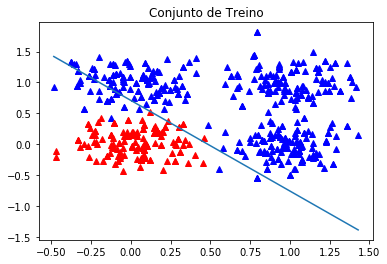

In [128]:
color = ['^b', '^r']

for point,y in zip(dados.x_training, dados.y_training):
    plt.plot(point[0], point[1], color[int(y)])

plt.plot(reta[0], reta[1])
plt.title("Conjunto de Treino")

### Gráfico teste

Text(0.5, 1.0, 'Conjunto de Teste')

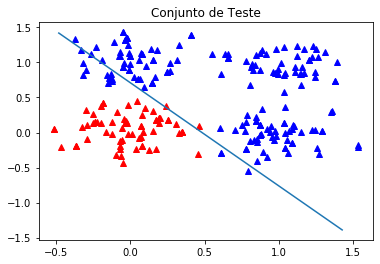

In [129]:
color = ['^b', '^r']

for point,y in zip(dados.x_test, dados.y_test):
    plt.plot(point[0], point[1], color[int(y)])
plt.plot(reta[0], reta[1])
plt.title("Conjunto de Teste")

# Discussão

Observando as métricas e sabendo a priori que o problema não é linearmente separável podemos afirmar que a solução alcançada pelo modelo Perceptron é satisfatória, com uma precisão de 0.9360.